In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

C:\Users\nesto\AppData\Local\Temp\ipykernel_12232\1489938809.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func

In [4]:
pip install sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 660.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 2.1 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.1 MB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 2.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.1 MB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 2.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.1/2.1 MB 2.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 3.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.1 MB 2.9 MB/s eta 0:00:01
   --------------

In [69]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [70]:
# reflect an existing database into a new model
# reflect the tables

Base = automap_base()
Base.prepare(autoload_with = engine)
Base.classes.keys()


['measurement', 'station']

In [71]:
# View all of the classes that automap found


In [72]:
# Save references to each table

Station = Base.classes.station

In [73]:
Measurement = Base.classes.measurement

In [74]:
session = Session(engine)

In [75]:
Inspector = inspect(engine)

In [76]:
Inspector.get_table_names()

['measurement', 'station']

In [16]:
for x in Inspector.get_columns("station"):
    print(x["name"])

id
station
name
latitude
longitude
elevation


In [18]:
for x in Inspector.get_columns('measurement'):
    print(x["name"])

id
station
date
prcp
tobs


In [19]:
class Station:
    def __init__(self, id, station, name, latitude, longitude, elevation):
        self.id = id
        self.station = station
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.elevation = elevation

class Measurement:
    def __init__(self, id, station, date, prcp, tobs):
        self.id = id
        self.station = station
        self.date = date
        self.prcp = prcp
        self.tobs = tobs

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [29]:
conn_sqlite = engine.connect()

In [32]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [33]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [35]:
session.query(func.count(Measurement.date)).all()

[(19550,)]

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [40]:
import datetime as dt

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017,8,23) -dt.timedelta(days=365)
query_date

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


datetime.date(2016, 8, 23)

In [46]:
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .all()

precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [49]:
import pandas as pd

C:\Users\nesto\AppData\Local\Temp\ipykernel_1708\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [50]:
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.sort_index(inplace=True)

In [52]:
import matplotlib.pyplot as plt

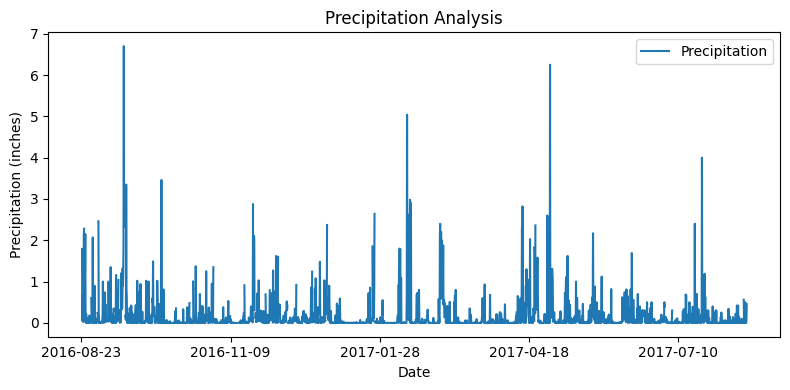

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(y='Precipitation', title="Precipitation Analysis", figsize=(8, 4))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = precipitation_df.describe()
print(precipitation_stats)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .first()

station_activity = session.query(Measurement.station, func.count(Measurement.station)) \
    .group_by(Measurement.station) \
    .order_by(func.count(Measurement.station).desc()) \
    .all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0]
most_active_station

('USC00519281', 2772)

#  Most active station ID is 'USC00519281'

In [93]:
most_active_station_id = 'USC00519281'

temperature_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == most_active_station_id) \
    .all()

In [94]:
min_temp, max_temp, avg_temp = temperature_data[0]
min_temp, max_temp, avg_temp

(54.0, 85.0, 71.66378066378067)

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = dt.date(2016, 8, 23)

# Now query the data
tobs_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station)\
    .filter(Measurement.date >= query_date)\
    .all()

tobs_data



ProgrammingError: (sqlite3.ProgrammingError) Error binding parameter 1: type 'Row' is not supported
[SQL: SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ?]
[parameters: (('USC00519281', 2772), '2016-08-23')]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [104]:
# Create a DataFrame for TOBS data
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

# Plot the histogram
plt.hist(tobs_df['Temperature'], bins=12, label='TOBS')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Temperature Observation (TOBS) for Station {most_active_station}")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

NameError: name 'tobs_data' is not defined

# Close Session

In [105]:
# Close Session
session.close()